In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pubg-weapon-stats/pubg-weapon-stats.csv


In [2]:
df=pd.read_csv("/kaggle/input/pubg-weapon-stats/pubg-weapon-stats.csv")
df.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [3]:
df.shape

(44, 20)

In [4]:
df.isnull().any()

Weapon Name              False
Weapon Type              False
Bullet Type               True
Damage                   False
Magazine Capacity        False
Range                     True
Bullet Speed              True
Rate of Fire             False
Shots to Kill (Chest)    False
Shots to Kill (Head)     False
Damage Per Second        False
Fire Mode                False
BDMG_0                    True
BDMG_1                    True
BDMG_2                    True
BDMG_3                    True
HDMG_0                    True
HDMG_1                    True
HDMG_2                    True
HDMG_3                    True
dtype: bool

In [5]:
df.dropna(axis=0,inplace=True)

In [6]:
df.shape

(35, 20)

0    Assault Rifle
1    Assault Rifle
2    Assault Rifle
3    Assault Rifle
4    Assault Rifle
Name: Weapon Type, dtype: object


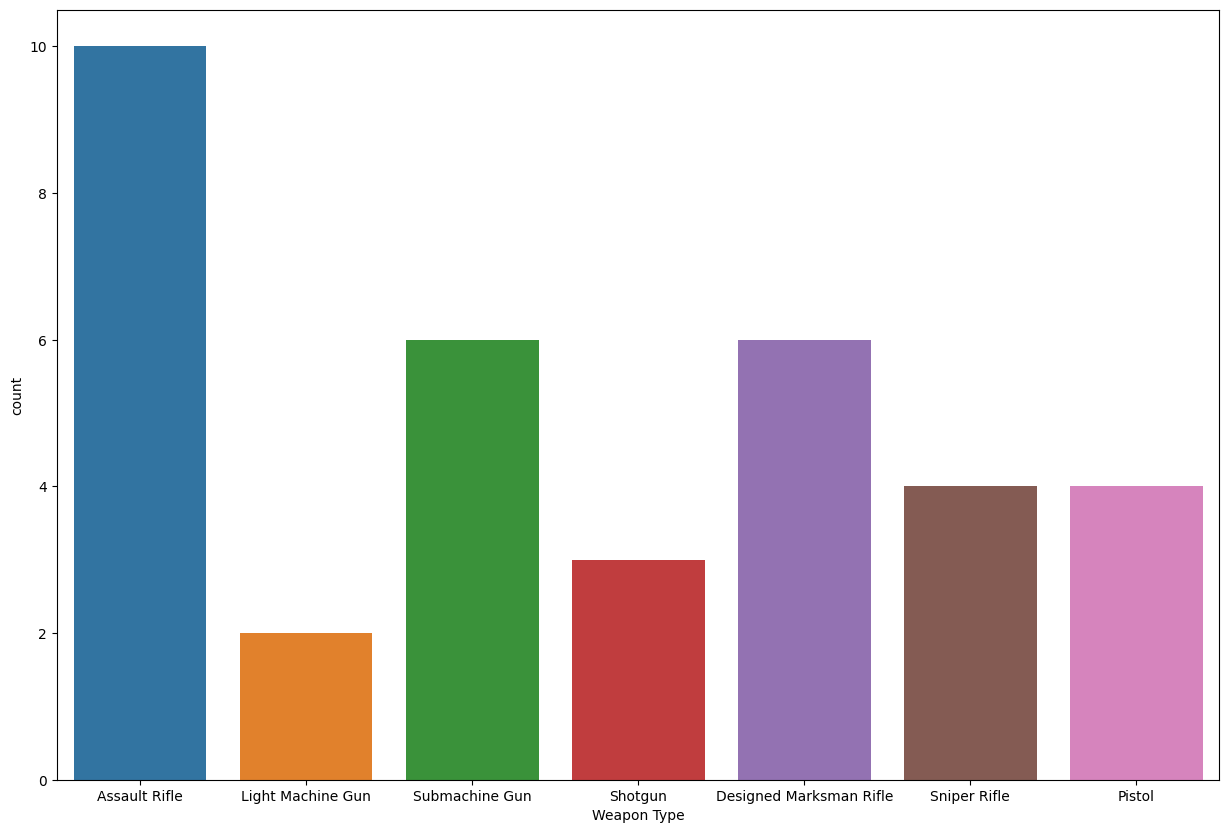

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check data
print(df['Weapon Type'].head())

# Handle NaN values if necessary
df['Weapon Type'] = df['Weapon Type'].fillna('Unknown')

# Plot countplot
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Weapon Type')
plt.show()


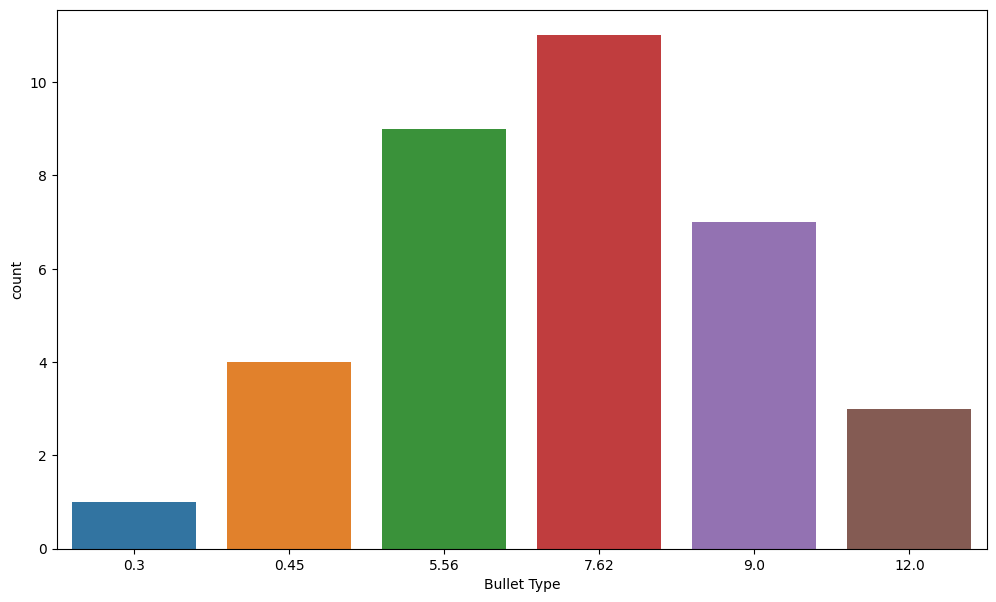

In [8]:
## bullet type
plt.figure(figsize=(12,7))
sns.countplot(data=df, x='Bullet Type')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Assault Rifle'),
  Text(1, 0, 'Light Machine Gun'),
  Text(2, 0, 'Submachine Gun'),
  Text(3, 0, 'Shotgun'),
  Text(4, 0, 'Designed Marksman Rifle'),
  Text(5, 0, 'Sniper Rifle'),
  Text(6, 0, 'Pistol')])

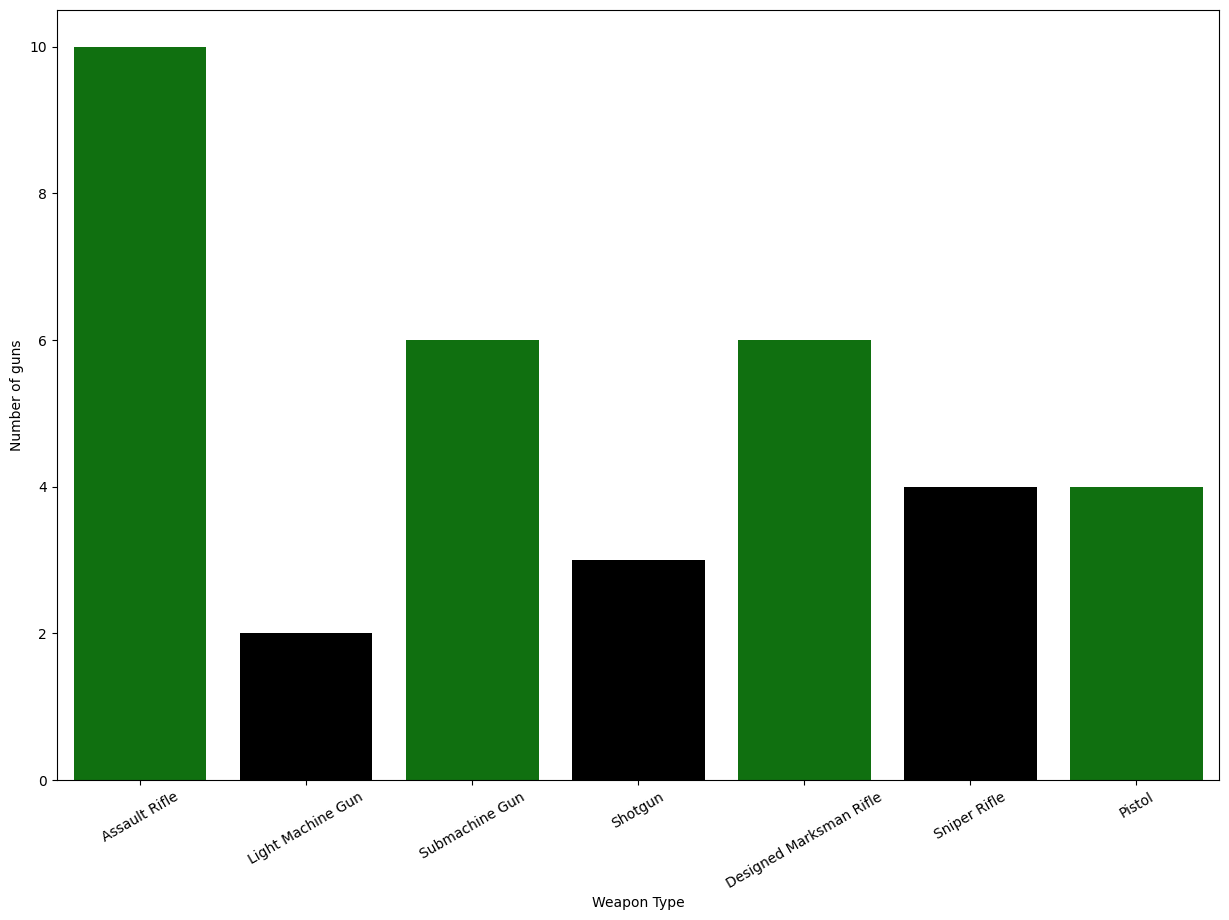

In [9]:
plt.figure(figsize=(15,10))
sns.countplot(x=df["Weapon Type"],palette=["green","black"],)
plt.ylabel("Number of guns")
plt.xticks(rotation=30)

In [10]:
#Weapons under AR
df.loc[df["Weapon Type"]=="Assault Rifle","Weapon Name"].reset_index()

,index,Weapon Name
0,0,Groza
1,1,AKM
2,2,M762
3,3,MK47 Mutant
4,4,AUG A3
5,5,SCAR-L
6,6,M416
7,7,M16A4
8,8,G36C
9,9,OBZ


**Sniper Weapons**

In [11]:
#Sniper weapons
df.loc[df["Weapon Type"]=="Sniper Rifle","Weapon Name"].reset_index()

,index,Weapon Name
0,27,AWM
1,28,M24
2,29,Kar98
3,30,Win94


****Light Machine Gun****

In [12]:
#Light Machine Guns
df.loc[df["Weapon Type"]=="Light Machine Gun","Weapon Name"].reset_index()

,index,Weapon Name
0,10,M249
1,11,DP-28


**ShotGun Weapon**

In [13]:
df.loc[df["Weapon Type"] == "Shotgun","Weapon Name"].reset_index()

,index,Weapon Name
0,18,S686
1,19,S1897
2,20,S12K


**Ammo Type**

In [14]:
df["Bullet Type"].value_counts().reset_index()

,Bullet Type,count
0,7.62,11
1,5.56,9
2,9.00,7
3,0.45,4
4,12.00,3
5,0.30,1
